Install & Import Kaggle Dataset

In [ ]:
# Install kagglehub (only once)
!pip install -q kagglehub


In [ ]:
# Download dataset
import kagglehub

dataset_path = kagglehub.dataset_download(
    "vjchoudhary7/customer-segmentation-tutorial-in-python"
)

print("Dataset downloaded at:", dataset_path)


Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Dataset downloaded at: /kaggle/input/customer-segmentation-tutorial-in-python


Import Required Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Load Dataset

In [ ]:
df = pd.read_csv(f"{dataset_path}/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Basic Data Exploration

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Distribution Plots

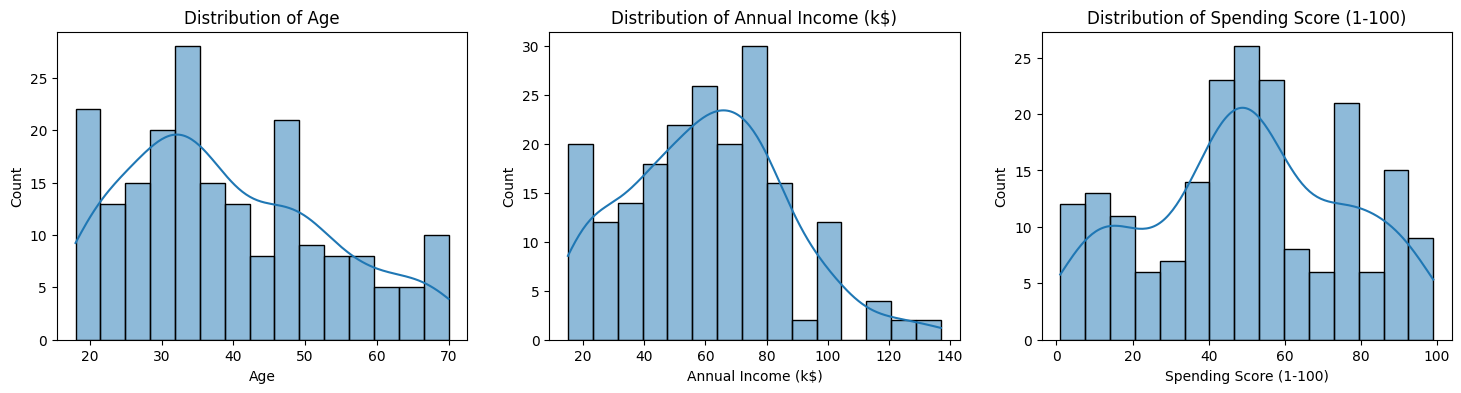

In [26]:
plt.figure(figsize=(18,4))
n = 0

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1,3,n)
  sns.histplot(df[col], bins=15, kde=True)
  plt.title(f"Distribution of {col}")

plt.show()


Pairplot

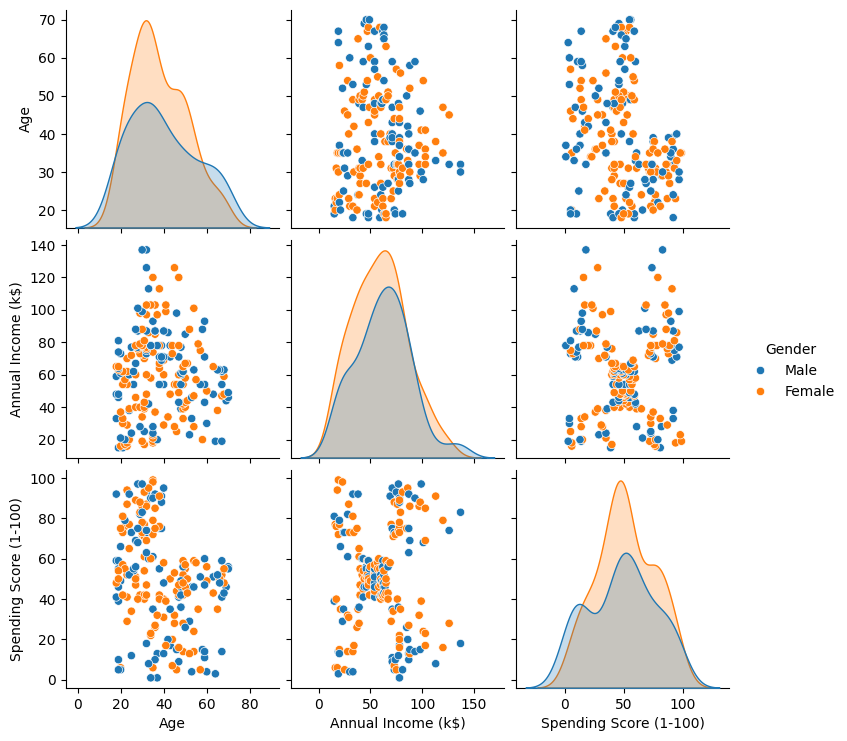

In [27]:
sns.pairplot(
    df,
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    hue='Gender'
)
plt.show()


Age vs Spending Score Scatter Plot

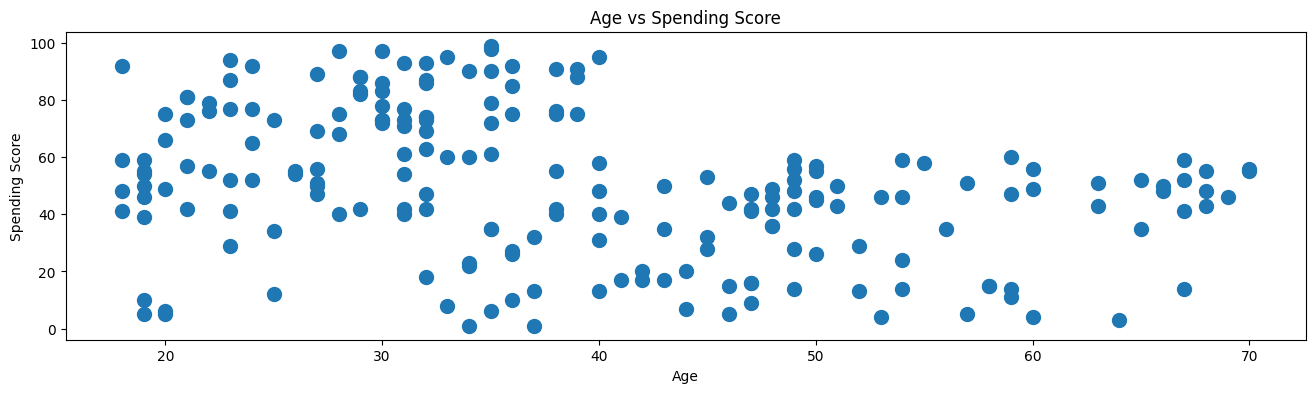

In [28]:
plt.figure(figsize=(16,4))
plt.scatter(df['Age'], df['Spending Score (1-100)'], s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()


Feature Scaling

In [29]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Elbow Method + Silhouette Score

In [32]:
wcss = []
silhouette_scores = []

K = range(2, 11)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)
  silhouette_scores.append(
      silhouette_score(scaled_features, kmeans.labels_)
  )

Elbow Plot

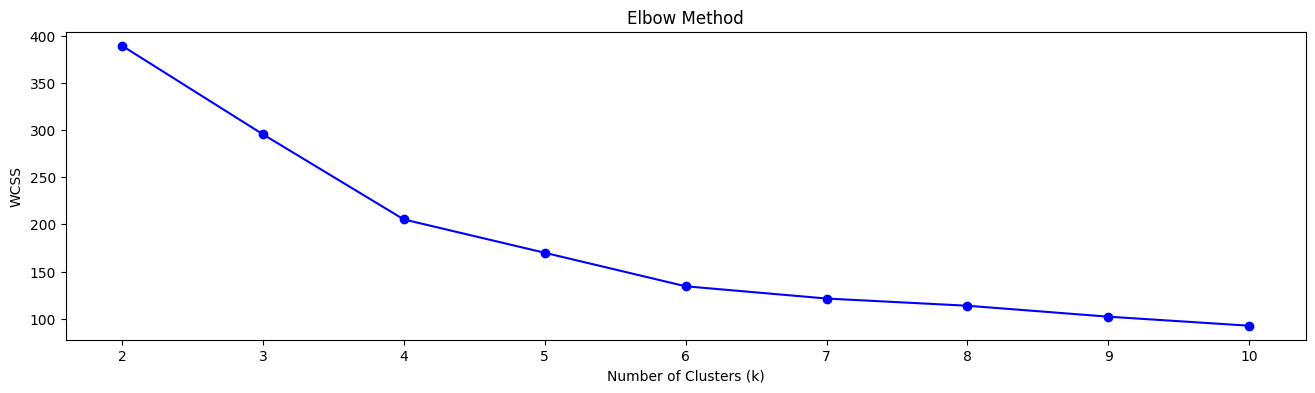

In [34]:
plt.figure(figsize=(16,4))
plt.plot(K, wcss, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

Silhouette Plot

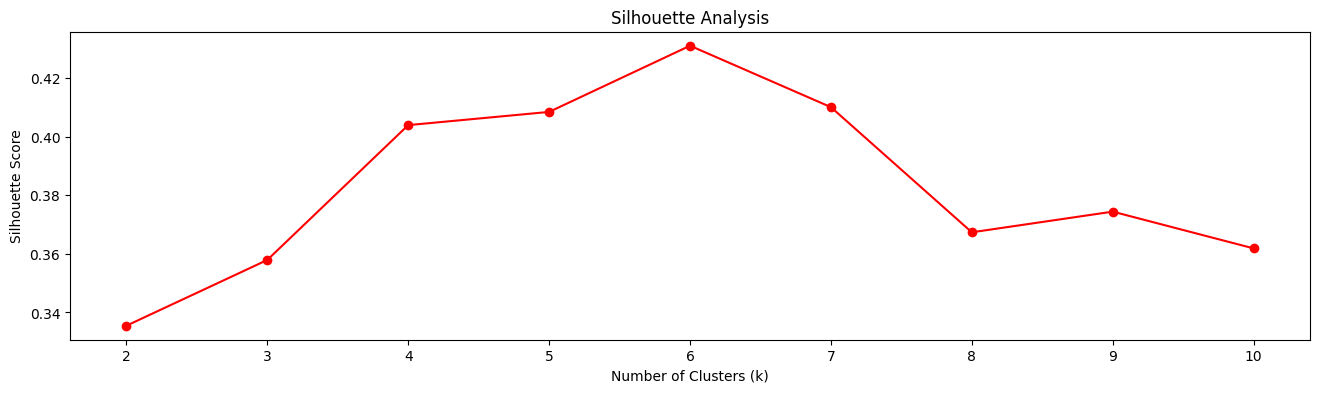

In [35]:
plt.figure(figsize=(16,4))
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

Apply KMeans (k = 5)

In [36]:
omptimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,cluster_3d
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,2,4


Cluster Interpretation

In [37]:
cluster_summary = df.groupby('Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()

cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


Cluster Visualization (Income vs Spending)

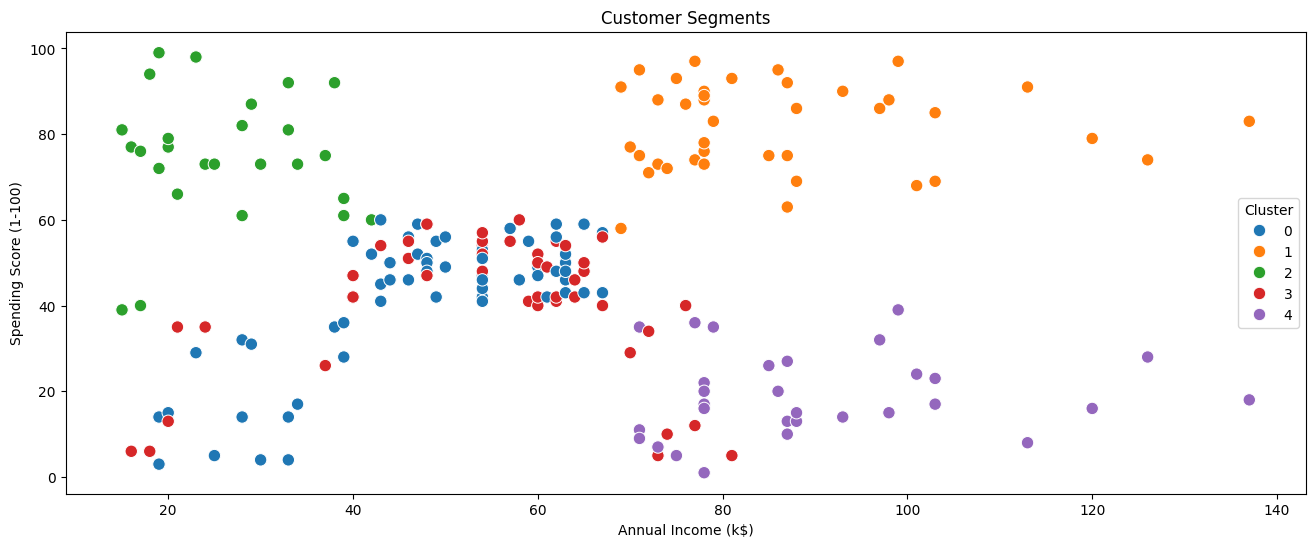

In [38]:
plt.figure(figsize=(16,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='tab10',
    s=80
)
plt.title("Customer Segments")
plt.show()

2D Clustering (Age vs Spending Score)

In [40]:
X1 = df[['Age', 'Spending Score (1-100)']].values

kmeans_2d = KMeans(n_clusters=5, random_state=111)
labels1 = kmeans_2d.fit_predict(X1)
centroids1 = kmeans_2d.cluster_centers_

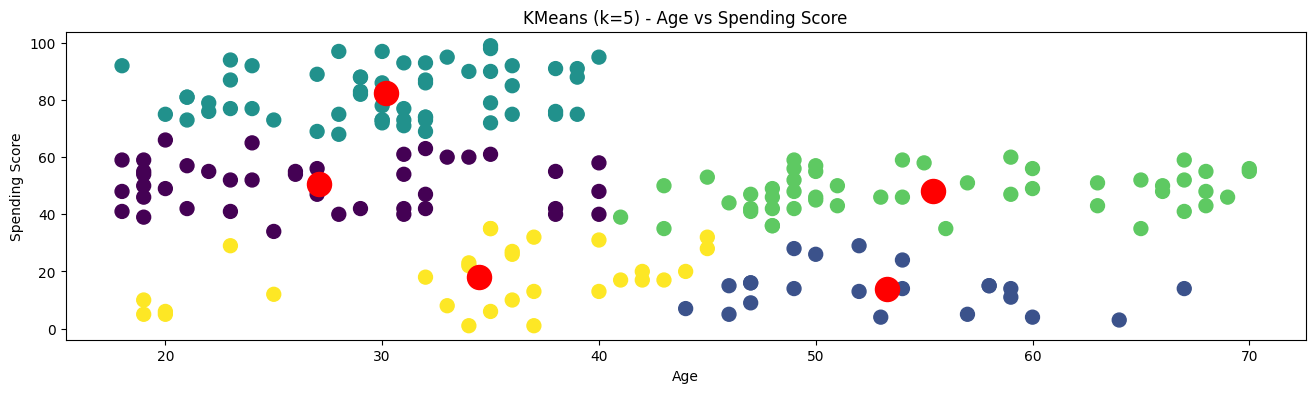

In [41]:
plt.figure(figsize=(16,4))
plt.scatter(X1[:,0], X1[:,1], c=labels1, s=100)
plt.scatter(centroids1[:,0], centroids1[:,1], c='red', s=300)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("KMeans (k=5) - Age vs Spending Score")
plt.show()

2D Clustering (Income vs Spending)

In [ ]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

kmeans_2d_2 = KMeans(n_clusters=5, random_state=111)
labels2 = kmeans_2d_2.fit_predict(X2)
centroids2 = kmeans_2d_2.cluster_centers_


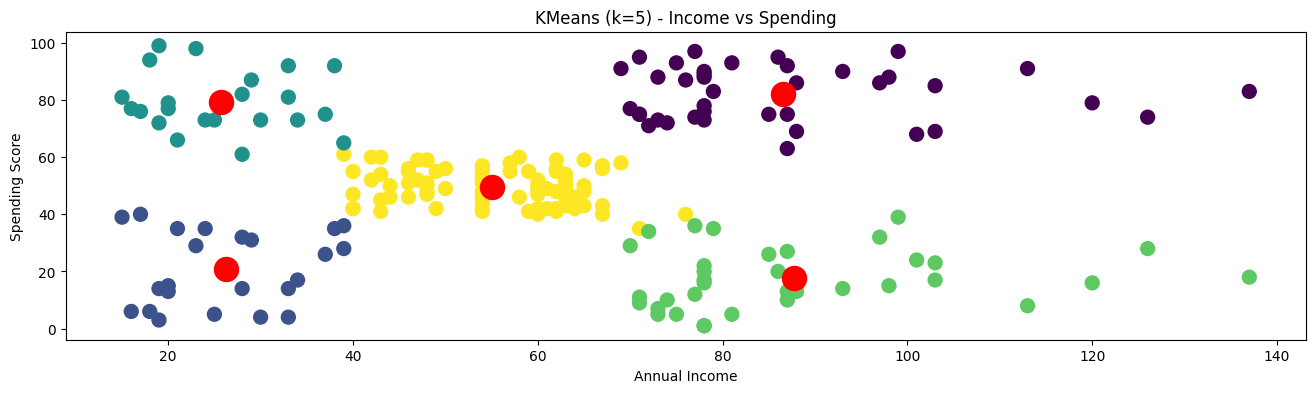

In [ ]:
plt.figure(figsize=(16,4))
plt.scatter(X2[:,0], X2[:,1], c=labels2, s=100)
plt.scatter(centroids2[:,0], centroids2[:,1], c='red', s=300)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("KMeans (k=5) - Income vs Spending")
plt.show()


3D Clustering (Age, Income, Spending)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

kmeans_3d = KMeans(n_clusters=6, random_state=111)
df['cluster_3d'] = kmeans_3d.fit_predict(X3)


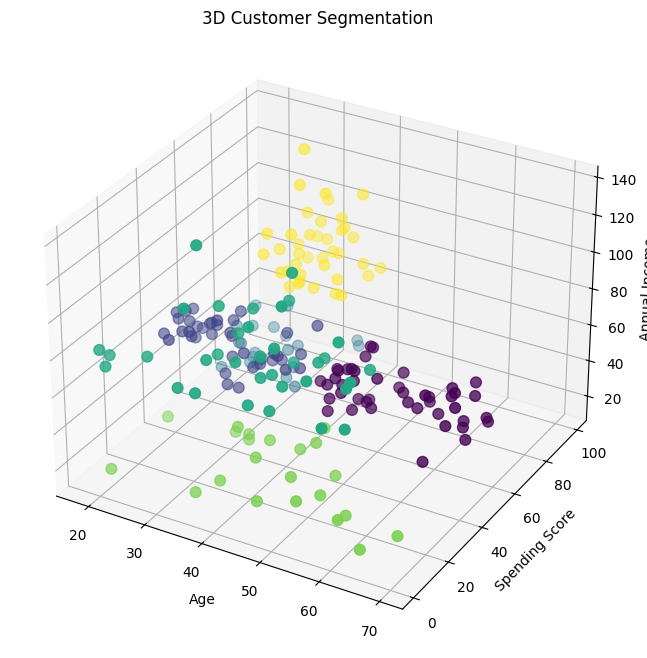

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Age'],
    df['Spending Score (1-100)'],
    df['Annual Income (k$)'],
    c=df['cluster_3d'],
    s=60
)

ax.set_xlabel("Age")
ax.set_ylabel("Spending Score")
ax.set_zlabel("Annual Income")
plt.title("3D Customer Segmentation")
plt.show()
